# Active Filtering with hub

In [1]:
from waffle_hub.hub.adapter.ultralytics import UltralyticsHub

hub = UltralyticsHub.load("ultralytics_mnist_detection")

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:16: UserWarning: 
            torch 1.13.1+cu117 has not been tested.
            We recommend you to use one of ['1.13.1']
            
  warnings.warn(
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:56: UserWarning: 
                ultralytics 8.0.91 has not been tested.
                We recommend you to use one of ['8.0.87']
                
  warnings.warn(


In [1]:
from waffle_menu.active_learning import RandomSampling, PL2NSampling

/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/lhj/anaconda3/envs/waffle/lib/python3.9/site-packages/waffle_hub/__init__.py:16: UserWarning: 
            torch 1.13.1+cu117 has not been tested.
            We recommend you to use one of ['1.13.1']
            
  warnings.warn(


In [3]:
RandomSampling(
    seed=1234
).sample(
    image_dir="mnist/images",
    num_images=5,
    result_dir="random_sampled",
    save_images=True
)

4it [00:00, 91.17it/s]


In [4]:
PL2NSampling(
    hub=hub
).sample(
    image_dir="mnist/images",
    num_images=5,
    result_dir="PL2N_sampled",
    save_images=True
)

4it [00:00,  7.69it/s]


In [5]:
import PIL.Image
from pathlib import Path

In [6]:
# display n images in a row with PIL
def display_images(images):
    images = [PIL.Image.open(image) for image in images]
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)
    new_im = PIL.Image.new("RGB", (total_width, max_height))
    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset, 0))
        x_offset += im.size[0]
    return new_im

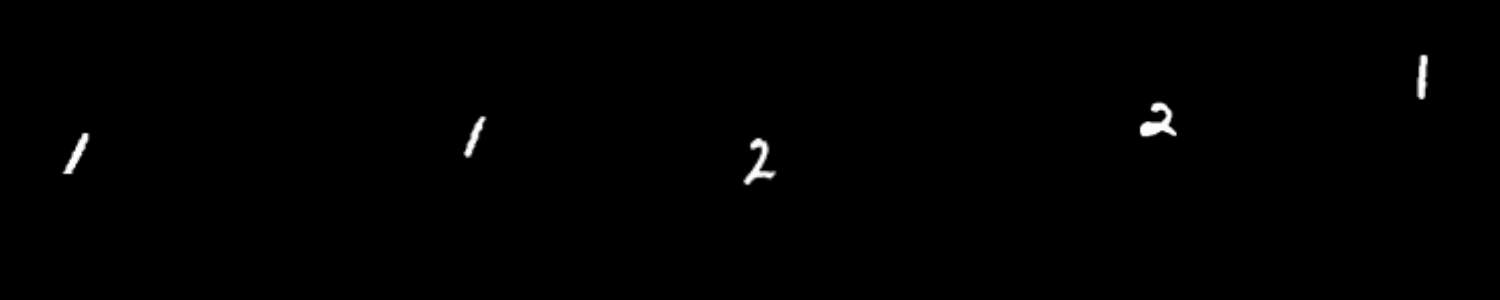

In [7]:
display_images(list(Path("random_sampled/images").glob("*.png")))

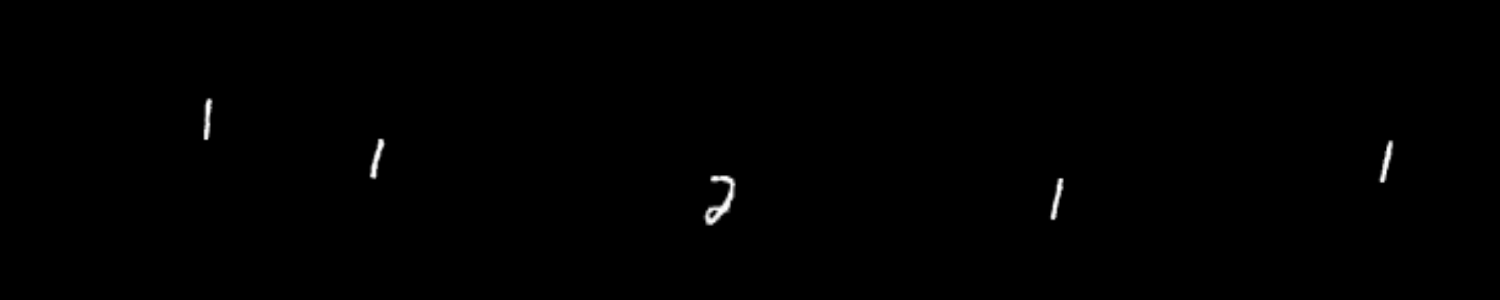

In [8]:
display_images(list(Path("PL2N_sampled/images").glob("*.png")))